In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
x1 = 7.9
x2 = 13.4
s1 = 2.3
s2 = 1.7
rho = -0.78

mu1_ml = x1 # Estimador de maxima verosimilitud de mu1
mu2_ml = x2 # Estimador de maxima verosimilitu de mu2

V = np.array([(s1**2, rho*s1*s2), (rho*s1*s2, s2**2)]) # Matriz de covarianza 
inv_V = np.linalg.inv(V) # Inversa de la matriz de covarianza
Lmax = 1/(2*np.pi*np.sqrt(np.linalg.det(V))) # Verosimilitud máxima

In [3]:
def q(mu1, mu2):
    exp = ((x1-mu1)/s1)**2 + ((x2-mu2)/s2)**2 - 2*rho*(x1-mu1)*(x2-mu2)/(s1*s2)
    return exp

In [4]:
mu1 = np.arange(x1-15, x1+15, 0.25)
mu2 = np.arange(x2-15, x2+15, 0.25)
mu1, mu2 = np.meshgrid(mu1, mu2)

exp = q(mu1, mu2)

L = Lmax*np.exp(-0.5*exp)
Lambd = np.exp(-0.5*exp)
J = exp

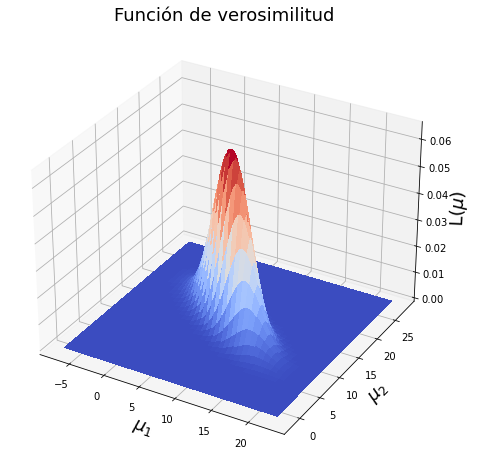

In [5]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.subplots(subplot_kw={"projection": "3d"})
ax1.plot_surface(mu1, mu2, L, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax1.set_xlabel('$\mu_1$', fontsize = 18)
ax1.set_ylabel('$\mu_2$', fontsize = 18)
ax1.set_zlabel('L($\mu$)', fontsize = 18)
plt.title('Función de verosimilitud', fontsize = 18)

plt.show()

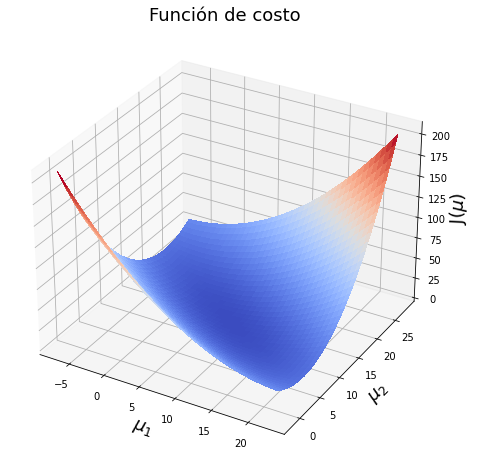

In [6]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.subplots(subplot_kw={"projection": "3d"})
ax1.plot_surface(mu1, mu2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax1.set_xlabel('$\mu_1$', fontsize = 18)
ax1.set_ylabel('$\mu_2$', fontsize = 18)
ax1.set_zlabel('J($\mu$)', fontsize = 18)
plt.title('Función de costo', fontsize = 18)

plt.show()

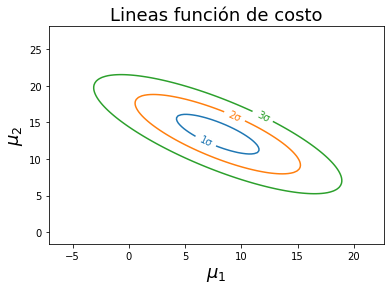

In [8]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel('$\mu_1$', fontsize = 18)
ax2.set_ylabel('$\mu_2$', fontsize = 18)

levels = J.min() + np.array([1, 4, 9]) 

contour = ax2.contour(mu1, mu2, J, levels, colors=['C0', 'C1', 'C2'])

fmt = {}
strs = ['1σ', '2σ', '3σ']
for l, s in zip(contour.levels, strs):
    fmt[l] = s
ax2.clabel(contour, fmt=fmt)

plt.title('Lineas función de costo', fontsize = 18)

plt.show()